In [1]:
import numpy as np
import pandas as pd


In [2]:
df_main=pd.read_csv("teleCust1000t.csv")

In [3]:
df_main.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


#### A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called _custcat_, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

In [4]:
df_main.shape

(1000, 12)

In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null int64
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null int64
address    1000 non-null int64
income     1000 non-null float64
ed         1000 non-null int64
employ     1000 non-null int64
retire     1000 non-null float64
gender     1000 non-null int64
reside     1000 non-null int64
custcat    1000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 93.8 KB


In [6]:
df_main['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

![title](images/knn1.png)

We will use KNN to build our classifier, this diagram shows the concept behind KNN.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A44B8A76D8>]],
      dtype=object)

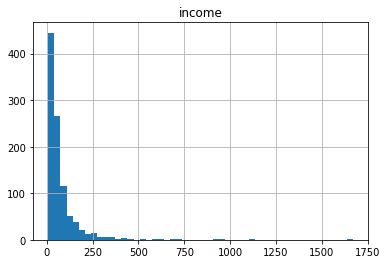

In [14]:
df_main.hist(column='income', bins=50)

In [29]:
# To use scikit-learn we have to convert the dataframe into a numpy array

X=df_main.drop(labels=['custcat'], axis=1).values
y=df_main['custcat'].values

In [31]:
# Lets see our data now

X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [32]:
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

# Normalization

In [34]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [35]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=4)
print("Train Set:",X_train.shape, y_train.shape)
print("Test Set:",X_test.shape, y_test.shape)

Train Set: (800, 11) (800,)
Test Set: (200, 11) (200,)


Here we have used 80% of our data for training from 1000 entries and the rest of the data for the testing.

# Classification time

In [37]:
# Importing the library
from sklearn.neighbors import KNeighborsClassifier

In [38]:
k=5
#Train the model
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

In [39]:
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
#Prediction
yhat=neigh.predict(X_test)

In [42]:
yhat

array([1, 3, 3, 4, 4, 3, 3, 4, 2, 4, 1, 4, 2, 1, 3, 1, 3, 3, 3, 4, 3, 2,
       1, 1, 1, 3, 2, 1, 1, 2, 3, 1, 4, 4, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       4, 1, 3, 1, 4, 4, 2, 1, 2, 3, 2, 3, 4, 3, 1, 4, 1, 4, 2, 3, 2, 1,
       1, 2, 2, 1, 1, 3, 2, 3, 2, 1, 1, 1, 2, 3, 3, 1, 2, 2, 4, 2, 3, 3,
       1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 3, 4, 2, 3, 3, 1, 1, 4, 2, 2, 1, 2,
       1, 2, 2, 4, 1, 2, 1, 3, 2, 3, 4, 1, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 4, 4, 1, 1, 2, 1, 1, 2, 2, 1, 2, 4, 3,
       2, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 4, 1, 1, 3, 1, 3, 3, 3, 2, 2, 2,
       1, 4, 1, 1, 1, 1, 1, 3, 3, 1, 2, 1, 4, 1, 3, 1, 3, 3, 3, 1, 1, 3,
       2, 3], dtype=int64)

In [43]:
#Accuracy evalution

from sklearn import metrics
print("Train set Accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy:",metrics.accuracy_score(y_test,yhat))

Train set Accuracy: 0.5375
Test set Accuracy: 0.315


In [45]:
# Lets check that what would be the best k for our model

Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

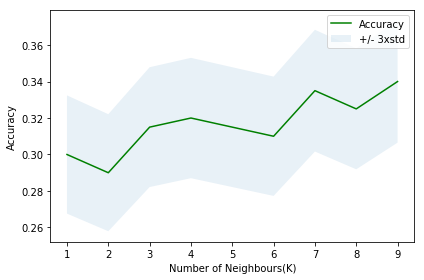

In [47]:
#Lets visualize what we have done
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbours(K)')
plt.tight_layout()
plt.show()

In [48]:
#Lets Get the best neighbour
print("The best accuracy was with",mean_acc.max(), "with k=",mean_acc.argmax()+1)

The best accuracy was with 0.34 with k= 9
